In [25]:
import numpy as np
import pandas as pd

In [26]:
diabetes = pd.read_csv("diabetic_data.csv")

In [27]:
# Decision tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [28]:
diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [29]:
diabetes['race'].fillna("None", inplace=True)
diabetes = diabetes.fillna(method='ffill')

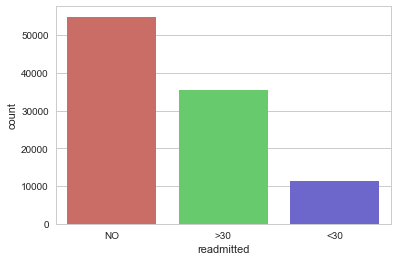

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x='readmitted',data=diabetes,palette = 'hls')
plt.show()

In [34]:
count_no_sub = len(diabetes[diabetes['readmitted']=='NO'])
count_sub = len(diabetes[diabetes['readmitted']=='>30'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no readmission is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of readmission geater then 30", pct_of_sub*100)

percentage of no readmission is 60.684223915760604
percentage of readmission geater then 30 39.3157760842394


In [35]:
#We can see that for patients for whom readmission have occurred,more were emergencies.  
diabetes.groupby('readmitted').mean()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
readmitted,,,,,,,,,,,,,
<30,1.627347e+08,5.519219e+07,1.976490,4.468874,5.821168,4.768249,44.226028,1.280884,16.903143,0.436911,0.357313,1.224003,7.692789
>30,1.603845e+08,5.814675e+07,2.029034,3.363061,5.965030,4.495541,43.836601,1.249599,16.282768,0.496329,0.283669,0.838993,7.646898
NO,1.688332e+08,5.167949e+07,2.030585,3.788149,5.604185,4.254429,42.381598,1.410305,15.670367,0.273112,0.109216,0.381963,7.221366


Text(0,0.5,'Readmissions')

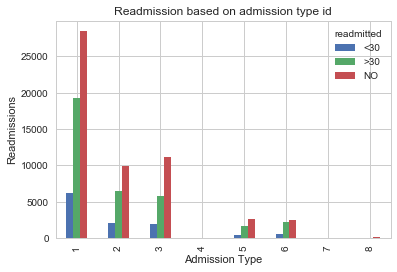

In [36]:
%matplotlib inline
pd.crosstab(diabetes.admission_type_id,diabetes.readmitted).plot(kind='bar')
plt.title('Readmission based on admission type id')
plt.xlabel('Admission Type')
plt.ylabel('Readmissions')
#We can see that re-admissions are highest when admission type is Emergency, followed by Urgent.

Text(0,0.5,'Readmissions')

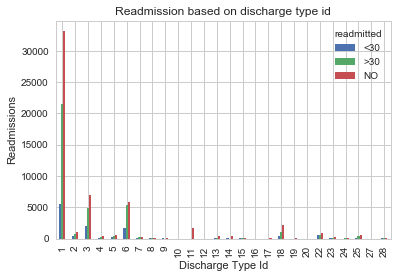

In [37]:
%matplotlib inline
pd.crosstab(diabetes.discharge_disposition_id,diabetes.readmitted).plot(kind='bar')
plt.title('Readmission based on discharge type id')
plt.xlabel('Discharge Type Id')
plt.ylabel('Readmissions')
#We can see that re-admissions are highest when discharge type is Discharged/transferred to home with home health service.

In [38]:

#Hot Encoding
df = pd.get_dummies(diabetes, columns=['insulin', 'change','diabetesMed','race'], drop_first=True)

df['gender'] = df['gender'].map({'Male':1,'Female':0})
df





,encounter_id,patient_nbr,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin_No,insulin_Steady,insulin_Up,change_No,diabetesMed_Yes,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,2278392,8222157,0.0,[0-10),?,6,25,1,1,?,...,1,0,0,1,0,0,0,1,0,0
1,149190,55629189,0.0,[10-20),?,1,1,7,3,?,...,0,0,1,0,1,0,0,1,0,0
2,64410,86047875,0.0,[20-30),?,1,1,7,2,?,...,1,0,0,1,1,1,0,0,0,0
3,500364,82442376,1.0,[30-40),?,1,1,7,2,?,...,0,0,1,0,1,0,0,1,0,0
4,16680,42519267,1.0,[40-50),?,1,1,7,1,?,...,0,1,0,0,1,0,0,1,0,0
5,35754,82637451,1.0,[50-60),?,2,1,2,3,?,...,0,1,0,1,1,0,0,1,0,0
6,55842,84259809,1.0,[60-70),?,3,1,2,4,?,...,0,1,0,0,1,0,0,1,0,0
7,63768,114882984,1.0,[70-80),?,1,1,7,5,?,...,1,0,0,1,1,0,0,1,0,0
8,12522,48330783,0.0,[80-90),?,2,1,4,13,?,...,0,1,0,0,1,0,0,1,0,0
9,15738,63555939,0.0,[90-100),?,3,3,4,12,?,...,0,1,0,0,1,0,0,1,0,0


In [39]:
columns = "insulin_No insulin_Steady insulin_Up change_No diabetesMed_Yes race_AfricanAmerican race_Asian race_Caucasian race_Hispanic race_Other admission_type_id discharge_disposition_id admission_source_id time_in_hospital num_lab_procedures num_procedures number_emergency".split()

df = pd.DataFrame(df, columns=columns) # load the dataset as a pandas data frame
y = diabetes.readmitted # define the target variable (dependent variable) as y

In [40]:
y.shape

(101766,)

In [41]:
df.shape

(101766, 17)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    df,
    y,
    test_size=0.3,
    random_state=42,
)

In [43]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train, y=y_train)
clf.feature_importances_ # [ 1.,  0.,  0.]
clf.score(X=X_test, y=y_test)

0.4485424172944645

In [44]:
clf.feature_importances_

array([0.02482762, 0.02310764, 0.01603568, 0.04458487, 0.0190942 ,
       0.01409093, 0.00242251, 0.01451783, 0.00463579, 0.00432666,
       0.05655291, 0.06879839, 0.03020786, 0.173866  , 0.36770596,
       0.11883936, 0.01638578])